# < 심혈관 질환 및 우울증 진단 시각화>

In [26]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.font_manager as fm
import scipy.stats

In [28]:
health2018 = pd.read_csv('hn18_all.csv')
health2017 = pd.read_csv('hn17_all.csv')

/Users/kimdokyeong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (146,436,555,570,572,587) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/kimdokyeong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (119,158,507,639,659) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [29]:
#2017년 데이터와 2018년 데이터중 고혈압 진단을 받은 사람 데이터를 추려내고 나이 데이터 추가
h18_DI1 = health2018.loc[:,'DI1_dg':'DI1_2']
age_bins = [20, 30, 40, 50, 60, 70, 80, 130]
group_names = ['20s','30s','40s','50s','60s','70s','80s']
age_cut_data = pd.cut(h18_DI1.DI1_ag, age_bins, labels = group_names, right = False)
h18_DI1['age_group'] = age_cut_data
h18_DI1_2 = h18_DI1.dropna()


h17_DI1 = health2017.loc[:, 'DI1_dg':'DI1_2']
age_bins = [20, 30, 40, 50, 60, 70, 80, 130]
group_names = ['20s','30s','40s','50s','60s','70s','80s']
age_cut_data = pd.cut(h17_DI1.DI1_ag, age_bins, labels = group_names, right = False)
h17_DI1['age_group'] = age_cut_data
h17_DI1_2 = h17_DI1.dropna()

## 고혈압 데이터 비교

### 어느 연령대에서 고혈압 진단을 가장 많이 받을까?

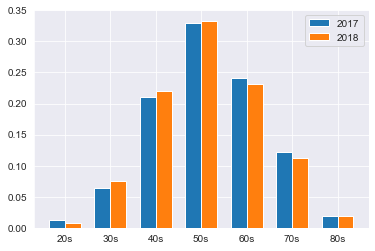

In [34]:
# 피드백 by 202055154 최태성
x_age = ['20s','30s','40s','50s','60s','70s','80s']
bar_width = 0.35


ratio_20s_18 = (h18_DI1_2['age_group'] == '20s').sum()/len(h18_DI1_2)
ratio_30s_18 = (h18_DI1_2['age_group'] == '30s').sum()/len(h18_DI1_2)
ratio_40s_18 = (h18_DI1_2['age_group'] == '40s').sum()/len(h18_DI1_2)
ratio_50s_18 = (h18_DI1_2['age_group'] == '50s').sum()/len(h18_DI1_2)
ratio_60s_18 = (h18_DI1_2['age_group'] == '60s').sum()/len(h18_DI1_2)
ratio_70s_18 = (h18_DI1_2['age_group'] == '70s').sum()/len(h18_DI1_2)
ratio_80s_18 = (h18_DI1_2['age_group'] == '80s').sum()/len(h18_DI1_2)

ratio_20s_17 = (h17_DI1_2['age_group'] == '20s').sum()/len(h17_DI1_2)
ratio_30s_17 = (h17_DI1_2['age_group'] == '30s').sum()/len(h17_DI1_2)
ratio_40s_17 = (h17_DI1_2['age_group'] == '40s').sum()/len(h17_DI1_2)
ratio_50s_17 = (h17_DI1_2['age_group'] == '50s').sum()/len(h17_DI1_2)
ratio_60s_17 = (h17_DI1_2['age_group'] == '60s').sum()/len(h17_DI1_2)
ratio_70s_17 = (h17_DI1_2['age_group'] == '70s').sum()/len(h17_DI1_2)
ratio_80s_17 = (h17_DI1_2['age_group'] == '80s').sum()/len(h17_DI1_2)


ratio_18 = [ratio_20s_18, ratio_30s_18, ratio_40s_18, ratio_50s_18, ratio_60s_18, ratio_70s_18, ratio_80s_18]
ratio_17 = [ratio_20s_17, ratio_30s_17, ratio_40s_17, ratio_50s_17, ratio_60s_17, ratio_70s_17, ratio_80s_17]
x = np.arange(len(ratio_18))

plt_2017 = plt.bar(x = x_age, height = ratio_17, width = bar_width, label = '2017')
plt_2018 = plt.bar(x = x + bar_width, height = ratio_18, width = bar_width, label = '2018')
plt.xticks(x + bar_width/2, x_age)
plt.legend(loc = 'best')
plt.show()

원래는 각 연도별로 고혈압을 진단받은 사람만 나타내었지만, 2017년도와 2018년도에 고혈압 진단 받은 사람의 수가 각각 다를 것이기 때문에 연령대별로 전체 고혈압 환자 중에서 각 연령대별의 비율로 나타내었다. 그 결과 2017년과 2018년 모두 50대에서 가장 고혈압 진단을 많이 받는다는 것을 알 수 있었다.

원래는 두개의 그래프를 겹쳐서 나타냈었는데, 그래프를 바로 옆에 붙여서 그리는 것이 차이를 더 한 눈에 알기 쉬울 것 같다고 생각해서 그래프 표현 방식을 변경하였다.

### 고혈압 약 복용이 가장 높은 연령대는 어디일까?

Text(0.5, 1.0, 'consumption of the medicine')

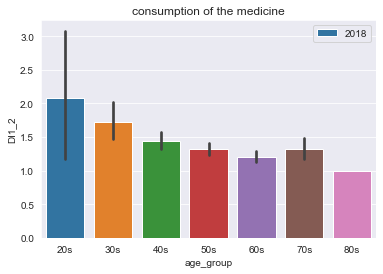

In [35]:
sns.barplot(x = h18_DI1_2['age_group'], y = h18_DI1_2['DI1_2'], label = '2018')

plt.legend(loc = 'best')
plt.title('consumption of the medicine')

Text(0.5, 1.0, 'consumption of the medicine')

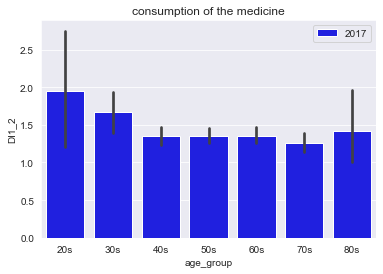

In [36]:
sns.barplot(x = h17_DI1_2['age_group'], y = h17_DI1_2['DI1_2'], color = 'blue', label = '2017')
plt.legend(loc = 'best')
plt.title('consumption of the medicine')

데이터의 각 변수에 대한 설명을 보면 고혈압 약 복용량 같은 경우 값이 1이면 한달동안 복용하는 고혈압 약의 횟수가 20회가 넘어간다는 것을 의미한다.
따라서 이 데이터를 나타낸 그래프를 보았을 때, 그래프가 나타내는 값이 작을수록 고혈압 약을 복용하는 횟수가 많다는 것을 뜻한다.

이를 통해서 2018년도에는 80대, 2017년도는 70대의 고혈압 복용량이 많다는 것을 알 수 있다. 즉, 고혈압 약을 많이복용하는 나이대는 주로 노년층이라는 것을 알 수 있다.

# 이상지질혈증 데이터 비교

### 어느 연령대에서 고혈압 진단을 가장 많이 받을까?

In [37]:
h18_DI2 = health2018.loc[:,'DI2_dg':'DI2_2']
index_name2 = h18_DI2[(h18_DI2['DI2_ag'] == 888) | (h18_DI2['DI2_ag'] == 999)].index
h18_DI2.drop(index_name2, inplace = True)
h18_DI2_2 = h18_DI2.dropna(subset=['DI2_ag'])

age_bins = [20, 30, 40, 50, 60, 70, 80, 130]
group_names = ['20s','30s','40s','50s','60s','70s','80s']
age_cut_data = pd.cut(h18_DI2_2.DI2_ag, age_bins, labels = group_names, right = False)
h18_DI2_2['age_group'] = age_cut_data
h18_DI2_3 = h18_DI2_2.dropna()

h17_DI2 = health2017.loc[:,'DI2_dg':'DI2_2']
index_name2 = h17_DI2[(h17_DI2['DI2_ag'] == 888) | (h17_DI2['DI2_ag'] == 999)].index
h17_DI2.drop(index_name2, inplace = True)
h17_DI2_2 = h17_DI2.dropna(subset=['DI2_ag'])

age_bins = [20, 30, 40, 50, 60, 70, 80, 130]
group_names = ['20s','30s','40s','50s','60s','70s','80s']
age_cut_data = pd.cut(h17_DI2_2.DI2_ag, age_bins, labels = group_names, right = False)
h17_DI2_2['age_group'] = age_cut_data
h17_DI2_3 = h17_DI2_2.dropna()

<ipython-input-37-754826e2a360>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h18_DI2_2['age_group'] = age_cut_data
<ipython-input-37-754826e2a360>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h17_DI2_2['age_group'] = age_cut_data


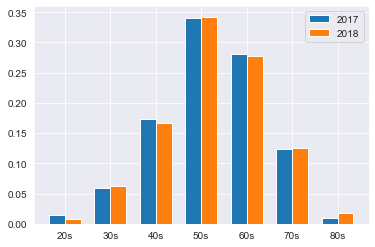

In [38]:
bar_width = 0.35
x = np.arange(len(ratio_18))

ratio_20s_18 = (h18_DI2_3['age_group'] == '20s').sum()/len(h18_DI2_3)
ratio_30s_18 = (h18_DI2_3['age_group'] == '30s').sum()/len(h18_DI2_3)
ratio_40s_18 = (h18_DI2_3['age_group'] == '40s').sum()/len(h18_DI2_3)
ratio_50s_18 = (h18_DI2_3['age_group'] == '50s').sum()/len(h18_DI2_3)
ratio_60s_18 = (h18_DI2_3['age_group'] == '60s').sum()/len(h18_DI2_3)
ratio_70s_18 = (h18_DI2_3['age_group'] == '70s').sum()/len(h18_DI2_3)
ratio_80s_18 = (h18_DI2_3['age_group'] == '80s').sum()/len(h18_DI2_3)

ratio_20s_17 = (h17_DI2_3['age_group'] == '20s').sum()/len(h17_DI2_3)
ratio_30s_17 = (h17_DI2_3['age_group'] == '30s').sum()/len(h17_DI2_3)
ratio_40s_17 = (h17_DI2_3['age_group'] == '40s').sum()/len(h17_DI2_3)
ratio_50s_17 = (h17_DI2_3['age_group'] == '50s').sum()/len(h17_DI2_3)
ratio_60s_17 = (h17_DI2_3['age_group'] == '60s').sum()/len(h17_DI2_3)
ratio_70s_17 = (h17_DI2_3['age_group'] == '70s').sum()/len(h17_DI2_3)
ratio_80s_17 = (h17_DI2_3['age_group'] == '80s').sum()/len(h17_DI2_3)


x_age = ['20s','30s','40s','50s','60s','70s','80s']

ratio_18 = [ratio_20s_18, ratio_30s_18, ratio_40s_18, ratio_50s_18, ratio_60s_18, ratio_70s_18, ratio_80s_18]
ratio_17 = [ratio_20s_17, ratio_30s_17, ratio_40s_17, ratio_50s_17, ratio_60s_17, ratio_70s_17, ratio_80s_17]
plt_2017 = plt.bar(x = x_age, height = ratio_17, width = bar_width, label = '2017')
plt_2018 = plt.bar(x = x + bar_width, height = ratio_18, width = bar_width, label = '2018')
plt.xticks(x + bar_width/2, x_age)
plt.legend(loc = 'best')
plt.show()

이상지질혈증도 마찬가지로 50대에서 진단받은 사람이 많다는 것을 알 수 있다.

### 이상지질혈증 약 복용이 가장 높은 연령대는 어디일까?

Text(0.5, 1.0, 'consumption of the medicine')

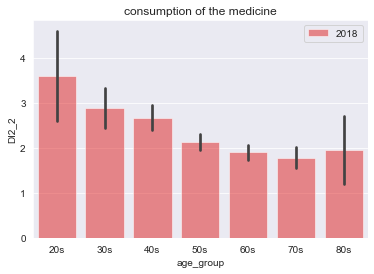

In [39]:
sns.barplot(x = h18_DI2_3['age_group'], y = h18_DI2_3['DI2_2'], alpha = 0.5, color = 'red', label = '2018')
plt.legend(loc = 'best')
plt.title('consumption of the medicine')

<AxesSubplot:xlabel='age_group', ylabel='DI2_2'>

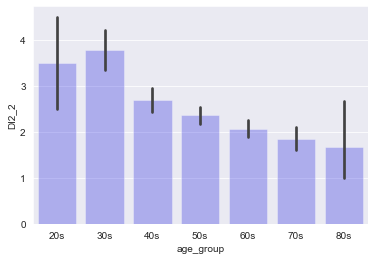

In [40]:
sns.barplot(x = h17_DI2_3['age_group'], y = h17_DI2_3['DI2_2'], alpha = 0.3, color = 'blue', label = '2017')

이상지질혈증도 앞서 고혈압과 마찬가지값이 작아질수록 한달에 복용하는 약의 횟수가 더 많다는 것을 의미한다.
이를 토대로 2018년도에는 70대가, 2017년도에는 80대에서 복용하는 약의 횟수가 더 많다는 것을 알 수 있는데 이는 노년층에서 이상지질혈증 약복용하는 사람이 많다는 것을 의미한다.

#### 의약품 복용 데이터가 없는 질병은 제외시켰습니다.

## 당뇨병 데이터 비교

### 어느 연령대에서 당뇨병 진단을 가장 많이 받을까?

In [42]:
h18_DE1 = health2018.loc[:,'DE1_dg':'DE1_35']
index_name2 = h18_DE1[(h18_DE1['DE1_ag'] == 888) | (h18_DE1['DE1_ag'] == 999)].index
h18_DE1.drop(index_name2, inplace = True)
h18_DE1_2 = h18_DE1.dropna(subset=['DE1_ag'])
h18_DE1_3 = h18_DE1_2.fillna(0)
age_bins = [20, 30, 40, 50, 60, 70, 80, 130]
group_names = ['20s','30s','40s','50s','60s','70s','80s']
age_cut_data = pd.cut(h18_DE1_3.DE1_ag, age_bins, labels = group_names, right = False)
h18_DE1_3['age_group'] = age_cut_data
h18_DE1_4 = h18_DE1_3.dropna()


h17_DE1 = health2017.loc[:,'DE1_dg':'DE1_35']
index_name3 = h17_DE1[(h17_DE1['DE1_ag'] == 888) | (h17_DE1['DE1_ag'] == 999)].index
h17_DE1.drop(index_name3, inplace = True)
h17_DE1_2 = h17_DE1.dropna(subset=['DE1_ag'])
h17_DE1_3 = h17_DE1_2.fillna(0)
age_bins = [20, 30, 40, 50, 60, 70, 80, 130]
group_names = ['20s','30s','40s','50s','60s','70s','80s']
age_cut_data = pd.cut(h17_DE1_3.DE1_ag, age_bins, labels = group_names, right = False)
h17_DE1_3['age_group'] = age_cut_data
h17_DE1_4 = h17_DE1_3.dropna()

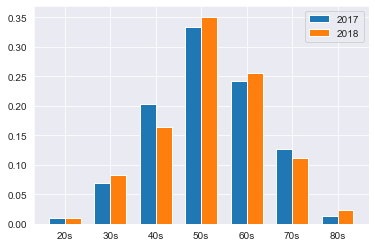

In [43]:
bar_width = 0.35
x = np.arange(len(ratio_18))

ratio_20s_18 = (h18_DE1_3['age_group'] == '20s').sum()/len(h18_DE1_3)
ratio_30s_18 = (h18_DE1_3['age_group'] == '30s').sum()/len(h18_DE1_3)
ratio_40s_18 = (h18_DE1_3['age_group'] == '40s').sum()/len(h18_DE1_3)
ratio_50s_18 = (h18_DE1_3['age_group'] == '50s').sum()/len(h18_DE1_3)
ratio_60s_18 = (h18_DE1_3['age_group'] == '60s').sum()/len(h18_DE1_3)
ratio_70s_18 = (h18_DE1_3['age_group'] == '70s').sum()/len(h18_DE1_3)
ratio_80s_18 = (h18_DE1_3['age_group'] == '80s').sum()/len(h18_DE1_3)

ratio_20s_17 = (h17_DE1_3['age_group'] == '20s').sum()/len(h17_DE1_3)
ratio_30s_17 = (h17_DE1_3['age_group'] == '30s').sum()/len(h17_DE1_3)
ratio_40s_17 = (h17_DE1_3['age_group'] == '40s').sum()/len(h17_DE1_3)
ratio_50s_17 = (h17_DE1_3['age_group'] == '50s').sum()/len(h17_DE1_3)
ratio_60s_17 = (h17_DE1_3['age_group'] == '60s').sum()/len(h17_DE1_3)
ratio_70s_17 = (h17_DE1_3['age_group'] == '70s').sum()/len(h17_DE1_3)
ratio_80s_17 = (h17_DE1_3['age_group'] == '80s').sum()/len(h17_DE1_3)


x_age = ['20s','30s','40s','50s','60s','70s','80s']

ratio_18 = [ratio_20s_18, ratio_30s_18, ratio_40s_18, ratio_50s_18, ratio_60s_18, ratio_70s_18, ratio_80s_18]
ratio_17 = [ratio_20s_17, ratio_30s_17, ratio_40s_17, ratio_50s_17, ratio_60s_17, ratio_70s_17, ratio_80s_17]
plt_2017 = plt.bar(x = x_age, height = ratio_17, width = bar_width, label = '2017')
plt_2018 = plt.bar(x = x + bar_width, height = ratio_18, width = bar_width, label = '2018')
plt.xticks(x + bar_width/2, x_age)
plt.legend(loc = 'best')
plt.show()

여기서도 2017년, 2018년 모두 50대가 가장 당뇨병 진단을 많이 받는다는 것을 알 수 있다.

### 당뇨병 약 복용이 가장 높은 연령대는 어디일까?

In [44]:
index_name4 = h18_DE1_4[(h18_DE1_4['DE1_31'] == 8) | (h18_DE1_4['DE1_31'] == 9) | (h18_DE1_4['DE1_32'] == 8) | (h18_DE1_4['DE1_32'] == 9) | (h18_DE1_4['DE1_33'] == 8 | (h18_DE1_4['DE1_33'] == 9) | (h18_DE1_4['DE1_34'] == 8) | (h18_DE1_4['DE1_34'] == 9))].index
h18_DE1_4.drop(index_name4, inplace = True)
group_DE1_18 = h18_DE1_4.groupby('age_group')
group_DE1_2_18 = group_DE1_18.mean()

index_name5 = h17_DE1_4[(h17_DE1_4['DE1_31'] == 8) | (h17_DE1_4['DE1_31'] == 9) | (h17_DE1_4['DE1_32'] == 8) | (h17_DE1_4['DE1_32'] == 9) | (h17_DE1_4['DE1_33'] == 8 | (h17_DE1_4['DE1_33'] == 9) | (h17_DE1_4['DE1_34'] == 8) | (h17_DE1_4['DE1_34'] == 9))].index
h17_DE1_4.drop(index_name5, inplace = True)
group_DE1_17 = h17_DE1_4.groupby('age_group')
group_DE1_2_17  = group_DE1_17.mean()


/Users/kimdokyeong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/kimdokyeong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


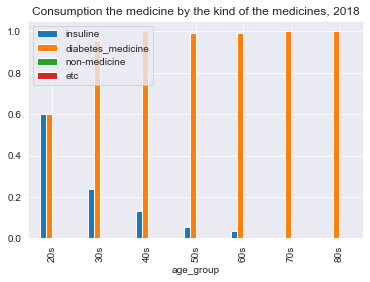

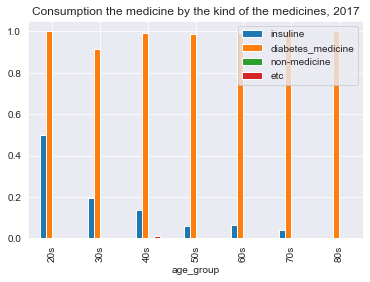

In [45]:
#DE1_31 = 인슐린주사, DE1_32 = 당뇨병약, DE1_33 = 비약물 요법, DE1_34 = 기타
group_DE1_2_18.loc[:,'DE1_31':'DE1_34'].plot.bar()
plt.title('Consumption the medicine by the kind of the medicines, 2018')
plt.legend(labels = ['insuline','diabetes_medicine','non-medicine','etc'],loc = 'best')


group_DE1_2_17.loc[:,'DE1_31':'DE1_34'].plot.bar()
plt.title('Consumption the medicine by the kind of the medicines, 2017')
plt.legend(labels = ['insuline','diabetes_medicine','non-medicine','etc'],loc = 'best')

In [46]:
print(len(h18_DE1_4[h18_DE1_4['age_group'] == '80s']))
print(len(h18_DE1_4[h18_DE1_4['age_group'] == '70s']))
print(len(h18_DE1_4[h18_DE1_4['age_group'] == '20s']))

13
61
5


In [47]:
ttest_for_20 = h18_DE1_4[h18_DE1_4['age_group']=='20s'].loc[:,'DE1_31']
ttest_for_80 = h18_DE1_4[h18_DE1_4['age_group']=='80s'].loc[:,'DE1_31']
ttest_for_70 = h18_DE1_4[h18_DE1_4['age_group']=='70s'].loc[:,'DE1_31']

In [48]:
scipy.stats.ttest_ind(ttest_for_20, ttest_for_80 , equal_var=False)

Ttest_indResult(statistic=2.449489742783178, pvalue=0.07048399691021993)

In [49]:
scipy.stats.ttest_ind(ttest_for_20, ttest_for_70 , equal_var=False)

Ttest_indResult(statistic=2.449489742783178, pvalue=0.07048399691021993)

시각화를 했을 떄, 20대에서 인슐린 주사를 더 많이 맞는다는 결과가 나와서 이것이 정말 사실인지 알아보기 위해서 t-test를 추가적으로 진행하였다.
그 결과, p값이 0.0704.. 으로 0.05보다 크기 때문에 유의하지 않다라는 것을 알 수 있고, 즉 이는 우연으로 인한 결과라는 것을 알 수 있었다.

### 분석결과

맨 처음 데이터 분석을 했을 떄 groupby.mean()을 사용하여 나타냈었는데, 당뇨병 치료 방법에 대한 답변중에서 답변을 안한 사람과 모른다고 응답한 사람들의 데이터까지 같이 포함되어 평균값이 나왔다는 것을 알게되어 이를 제외시키고 시각화를 하였다.

그 결과, 많은 당뇨병 치료방법 중에서 인슐린주사와 당뇨병약에서만 응답을 했다는 것을 알 수 있었다.

하지만, 여기서 의문점이 드는 것은 인슐린 주사는 보통 나이가 있으신 분들이 맞으시는게 아닌가 라는 것이었다.

그렇지만 여기서 고려해야할 것은 70대의 수는 61, 80대의 수는 13명으로 전체 데이터의 행의 개수에 비해 작은 숫자로, 이를 통해서 일반화 하기에는 어렵다는 것이다.(2018년 기준)

또, 20대에서 인슐린 주사를 맞는 수치가 제일 높게 나왔는데, 이 또한 20대의 수는 5명으로 일반화하기에는 데이터의 양이 부족하다는 것을 알 수 있었다.(2018년 기준)

실제로 t-test를 진행해보았을 때 p값이 0.05보다 크게 나왔다. 따라서 이 분석 결과는 우연에 의한 것인 것으로 추정할 수 있다.

전체적으로 보았을 때, 당뇨병 진단 받은 사람들 대부분이 당뇨병 약을 복용한다는 것을 알 수 있다.

# 우울증 데이터 비교

In [51]:
h18_DF2 = health2018.loc[:,'DF2_dg':'DF2_pt']
index_name2 = h18_DF2[(h18_DF2['DF2_ag'] == 888) | (h18_DF2['DF2_ag'] == 999)].index
h18_DF2.drop(index_name2, inplace = True)
h18_DF2_2 = h18_DF2.dropna(subset=['DF2_ag'])

age_bins = [20, 30, 40, 50, 60, 70, 80, 130]
group_names = ['20s','30s','40s','50s','60s','70s','80s']
age_cut_data = pd.cut(h18_DF2_2.DF2_ag, age_bins, labels = group_names, right = False)
h18_DF2_2['age_group'] = age_cut_data
h18_DF2_3 = h18_DF2_2.dropna()

h17_DF2 = health2017.loc[:,'DF2_dg':'DF2_pt']
index_name2 = h17_DF2[(h17_DF2['DF2_ag'] == 888) | (h17_DF2['DF2_ag'] == 999)].index
h17_DF2.drop(index_name2, inplace = True)
h17_DF2_2 = h17_DF2.dropna(subset=['DF2_ag'])

age_bins = [20, 30, 40, 50, 60, 70, 80, 130]
group_names = ['20s','30s','40s','50s','60s','70s','80s']
age_cut_data = pd.cut(h17_DF2_2.DF2_ag, age_bins, labels = group_names, right = False)
h17_DF2_2['age_group'] = age_cut_data
h17_DF2_3 = h17_DF2_2.dropna()

<ipython-input-51-5822c3f3d42f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h18_DF2_2['age_group'] = age_cut_data
<ipython-input-51-5822c3f3d42f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h17_DF2_2['age_group'] = age_cut_data


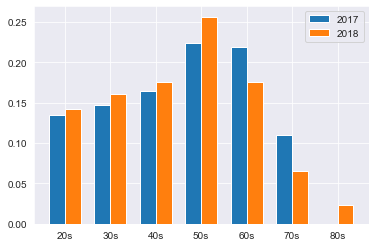

In [52]:
bar_width = 0.35
x = np.arange(len(ratio_18))

ratio_20s_18 = (h18_DF2_3['age_group'] == '20s').sum()/len(h18_DF2_3)
ratio_30s_18 = (h18_DF2_3['age_group'] == '30s').sum()/len(h18_DF2_3)
ratio_40s_18 = (h18_DF2_3['age_group'] == '40s').sum()/len(h18_DF2_3)
ratio_50s_18 = (h18_DF2_3['age_group'] == '50s').sum()/len(h18_DF2_3)
ratio_60s_18 = (h18_DF2_3['age_group'] == '60s').sum()/len(h18_DF2_3)
ratio_70s_18 = (h18_DF2_3['age_group'] == '70s').sum()/len(h18_DF2_3)
ratio_80s_18 = (h18_DF2_3['age_group'] == '80s').sum()/len(h18_DF2_3)

ratio_20s_17 = (h17_DF2_3['age_group'] == '20s').sum()/len(h17_DF2_3)
ratio_30s_17 = (h17_DF2_3['age_group'] == '30s').sum()/len(h17_DF2_3)
ratio_40s_17 = (h17_DF2_3['age_group'] == '40s').sum()/len(h17_DF2_3)
ratio_50s_17 = (h17_DF2_3['age_group'] == '50s').sum()/len(h17_DF2_3)
ratio_60s_17 = (h17_DF2_3['age_group'] == '60s').sum()/len(h17_DF2_3)
ratio_70s_17 = (h17_DF2_3['age_group'] == '70s').sum()/len(h17_DF2_3)
ratio_80s_17 = (h17_DF2_3['age_group'] == '80s').sum()/len(h17_DF2_3)


x_age = ['20s','30s','40s','50s','60s','70s','80s']

ratio_18 = [ratio_20s_18, ratio_30s_18, ratio_40s_18, ratio_50s_18, ratio_60s_18, ratio_70s_18, ratio_80s_18]
ratio_17 = [ratio_20s_17, ratio_30s_17, ratio_40s_17, ratio_50s_17, ratio_60s_17, ratio_70s_17, ratio_80s_17]
plt_2017 = plt.bar(x = x_age, height = ratio_17, width = bar_width, label = '2017')
plt_2018 = plt.bar(x = x + bar_width, height = ratio_18, width = bar_width, label = '2018')
plt.xticks(x + bar_width/2, x_age)
plt.legend(loc = 'best')
plt.show()

2017년과 2018년 모두 전체 우울증 환자 중 50대에서 우울증 진단을 받은 비율이 가장 높게 나타났다.

또, 2017년 대비 2018년에서 20대에서 40대에서 우울증 진단받은 비율이 증가했다는 것을 알 수 있다.

## 우울증 치료 여부

/Users/kimdokyeong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text(0.5, 1.0, 'Person under treatment')

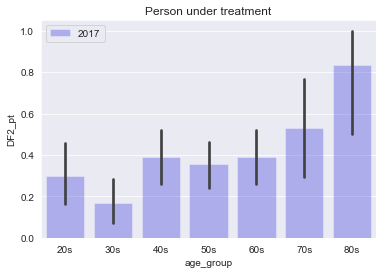

In [53]:
index_name6 = h18_DF2_3[(h18_DF2_3['DF2_pt'] == 8) | (h18_DF2_3['DF2_pt'] == 9)].index
h18_DF2_3.drop(index_name6, inplace = True)

sns.barplot(x = h18_DF2_3['age_group'], y = h18_DF2_3['DF2_pt'], alpha = 0.3, color = 'blue', label = '2017')
plt.legend(loc = 'best')
plt.title('Person under treatment')

/Users/kimdokyeong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text(0.5, 1.0, 'Person under treatment')

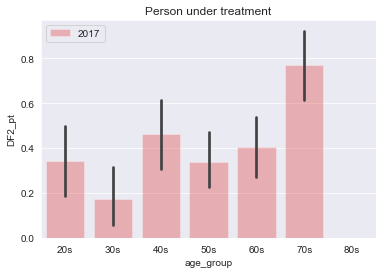

In [54]:
index_name7 = h17_DF2_3[(h17_DF2_3['DF2_pt'] == 8) | (h17_DF2_3['DF2_pt'] == 9)].index
h17_DF2_3.drop(index_name7, inplace = True)

sns.barplot(x = h17_DF2_3['age_group'], y = h17_DF2_3['DF2_pt'], alpha = 0.3, color = 'red', label = '2017')
plt.legend(loc = 'best')
plt.title('Person under treatment')

/Users/kimdokyeong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/kimdokyeong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text(0.5, 1.0, 'Person under treatment')

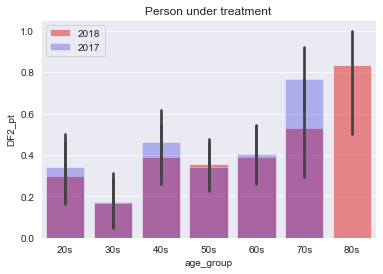

In [55]:
index_name6 = h18_DF2_3[(h18_DF2_3['DF2_pt'] == 8) | (h18_DF2_3['DF2_pt'] == 9)].index
h18_DF2_3.drop(index_name6, inplace = True)

sns.barplot(x = h18_DF2_3['age_group'], y = h18_DF2_3['DF2_pt'], alpha = 0.5, color = 'red', label = '2018')
plt.legend(loc = 'best')
plt.title('Person under treatment')

index_name7 = h17_DF2_3[(h17_DF2_3['DF2_pt'] == 8) | (h17_DF2_3['DF2_pt'] == 9)].index
h17_DF2_3.drop(index_name7, inplace = True)

sns.barplot(x = h17_DF2_3['age_group'], y = h17_DF2_3['DF2_pt'], alpha = 0.3, color = 'blue', label = '2017')
plt.legend(loc = 'best')
plt.title('Person under treatment')

앞서 20대~40대가 전년도(2017년) 대비 2018년도에 우울증 진단받은 비율이 늘었다고 언급했는데, 그에 반해 우울을 치료하고 있는 수는 2017년도 대비 2018년도에 줄어들었다는 것을 알 수 있다.

### 정말 줄어든게 맞을까?

In [56]:
ttest_for_dep_17_20s = h17_DF2_3[h17_DF2_3['age_group'] == '20s'].loc[:, 'DF2_pt']
                                 
ttest_for_dep_18_20s = h18_DF2_3[h18_DF2_3['age_group'] == '20s'].loc[:, 'DF2_pt']

ttest_for_dep_17_30s = h17_DF2_3[h17_DF2_3['age_group'] == '30s'].loc[:, 'DF2_pt']

ttest_for_dep_18_30s = h18_DF2_3[h18_DF2_3['age_group'] == '30s'].loc[:, 'DF2_pt']

ttest_for_dep_17_40s = h17_DF2_3[h17_DF2_3['age_group'] == '40s'].loc[:, 'DF2_pt']

ttest_for_dep_18_40s = h18_DF2_3[h18_DF2_3['age_group'] == '40s'].loc[:, 'DF2_pt']

In [57]:
#20대 결과가 유의한가?
scipy.stats.ttest_ind(ttest_for_dep_17_20s, ttest_for_dep_18_20s , equal_var=False)

Ttest_indResult(statistic=0.40616829263618054, pvalue=0.6859588915732706)

In [58]:
#30대 결과가 유의한가?
scipy.stats.ttest_ind(ttest_for_dep_17_30s, ttest_for_dep_18_30s , equal_var=False)

Ttest_indResult(statistic=0.054748264457941793, pvalue=0.9564903311680869)

In [59]:
#40대 결과가 유의한가?
scipy.stats.ttest_ind(ttest_for_dep_17_40s, ttest_for_dep_18_40s , equal_var=False)

Ttest_indResult(statistic=0.6456545667771544, pvalue=0.5203485183372716)

### 분석결과

20대~40대 모두 p의 값이 0.05보다 크게 나왔다. 즉, 통계적으로 유의하지 않다는 것을 알 수 있다.

# 결론

1. 심혈관 질환은 50대에서 많이 진단을 받는다.

2. 심혈관 질환 약 복용을 가장 많이 하는 연령대는 노년층(70~80대)이다.

3. 당뇨병 또한 50대 연령에서 가장 많이 진단을 받는다.

4. 당뇨병 치료약으로는 보통 인슐린 주사보다는 당뇨병 약을 많이 복용한다.

5. 우울증은 20대~40대에서 전년 대비 우울증 진단의 비율이 늘어났다.

6. 하지만 치료받는 수는 전년 대비 감소한것으로 보이지만 t-test를 진행한 결과 유의하지 않다는 결과를 얻을 수 있었다.

데이터의 양이 더 많으면 훨씬 정확하게 나왔지 않았을까 생각한다.

## 이전과 달라진 것

1. 진단 받은 비율로 시각화

2. 의약품 복용량이 제시되어있지 않은 심혈관 질환은 제외시킴

3. 당뇨병 약 복용과 우울증 치료에 관한 t-test 진행

# <혈관성 우울증>

## 60대 이상 우울증 유병환자 중 심혈관 질환을 앓는 사람 

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

'%.3f'

## 데이터 불러오기 

In [2]:
# 2010년부터 2018년까지의 데이터를 불러옴
data1 = pd.read_excel('hn18_all.xlsx')
data2 = pd.read_excel('hn17_all.xlsx')
data3 = pd.read_excel('hn16_all.xlsx')
data4 = pd.read_excel('hn15_all.xlsx')
data5 = pd.read_excel('hn14_all.xlsx')
data6 = pd.read_excel('hn13_all.xlsx')
data7 = pd.read_excel('hn12_all.xlsx')
data8 = pd.read_excel('hn11_all.xlsx')
data9 = pd.read_excel('hn10_all.xlsx')

## 데이터 합치기

In [3]:
# 2010년부터 2018년까지의 데이터를 하나로 합침
data = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9])
data

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,F_ICECM,F_SODA,F_COFFEE,F_TEA,F_BEER,F_SOJU,F_RWINE,F_HAMBER,F_PIZZA,F_FRIED
0,2020.09.01.,A901020501,A9010205,2018,1,1,2,A901,1,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.09.01.,A901021301,A9010213,2018,1,1,2,A901,1,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.09.01.,A901021302,A9010213,2018,1,1,2,A901,2,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.09.01.,A901022601,A9010226,2018,1,1,2,A901,2,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020.09.01.,A901023303,A9010233,2018,1,1,2,A901,2,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8953,2019.03.06.,P311960702,P3119607,2010,16,1,1,P311,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8954,2019.03.06.,P311960703,P3119607,2010,16,1,1,P311,2,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8955,2019.03.06.,P311960704,P3119607,2010,16,1,1,P311,1,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8956,2019.03.06.,P311960902,P3119609,2010,16,1,1,P311,2,20,...,4.0,0.0,7.0,3.0,4.0,4.0,4.0,2.0,3.0,5.0


## 60세 이상 우울증 유병환자들만 선정

In [4]:
d_data = data[(data['DF2_pr'] == 1) & (data['age'] >= 60)]
d_data.head()

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,F_ICECM,F_SODA,F_COFFEE,F_TEA,F_BEER,F_SOJU,F_RWINE,F_HAMBER,F_PIZZA,F_FRIED
125,2020.09.01.,A904023001,A9040230,2018,1,1,1,A904,1,77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,2020.09.01.,A904023002,A9040230,2018,1,1,1,A904,2,72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,2020.09.01.,A904026901,A9040269,2018,1,1,1,A904,1,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,2020.09.01.,A905028901,A9050289,2018,1,1,1,A905,1,77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,2020.09.01.,A906029801,A9060298,2018,1,1,2,A906,1,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 고혈압

In [5]:
#우울증 앓는 사람 중 고혈압 환자 비율
#대상자가 아닌 사람들은 제외 (8,9)
d_data1 = d_data.drop(d_data[(d_data['DI1_pr'] == 8) | (d_data['DI1_pr'] == 9)].index)
(d_data1['DI1_pr'] == 1).sum() / len(d_data1)

0.9484848484848485

In [6]:
#우울증 앓는 사람 중 고혈압 환자를 뺀 비율
(d_data1['DI1_pr'] == 0).sum() / len(d_data1)

0.051515151515151514

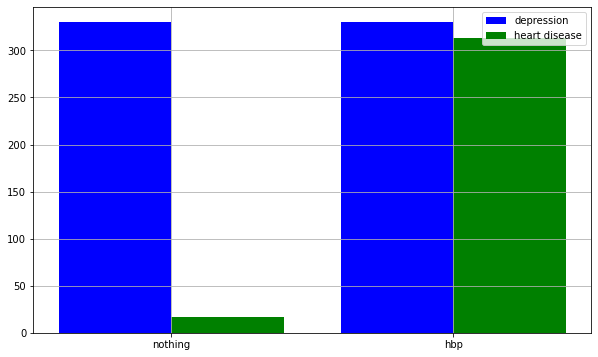

In [7]:
#파란색이 우울증 환자 수, 초록색 중 왼쪽은 고혈압을 앓지 않는 환자 수, 오른쪽은 고혈압 환자 수
y1 = np.array([len(d_data1),len(d_data1)])
y2 = np.array([(d_data1['DI1_pr'] == 0).sum(),(d_data1['DI1_pr'] == 1).sum()])

# X축 데이터
x = np.arange(len(y1))

# 그래프 너비
w = 0.4

# 그래프 크기 지정
plt.figure(figsize = (10, 6))

# 그래프 출력. y2는 막대의 너비만큼 오른쪽으로 이동시켜 그림
plt.bar(x, y1, color = 'blue', width = w, label = 'depression', align = 'center')
plt.bar(x + w, y2, color='green', width = w, label = 'heart disease', align = 'center')

# 최적 위치에 범례 배치
plt.legend(loc = 'best')
plt.xticks(x + w / 2, ['nothing','hbp'])
plt.grid(True)

### 이상지질혈증

In [8]:
#우울증 앓는 사람 중 이상지질혈증 환자 비율
#대상자가 아닌 사람들은 제외 (8,9)
d_data2 = d_data.drop(d_data[(d_data['DI2_pr'] == 8) | (d_data['DI2_pr'] == 9)].index)
(d_data2['DI2_pr'] == 1).sum() / len(d_data2)

0.8140350877192982

In [9]:
#우울증 앓는 사람 중 이상지질혈증 환자를 뺀 비율
(d_data2['DI2_pr'] == 0).sum() / len(d_data2)

0.18596491228070175

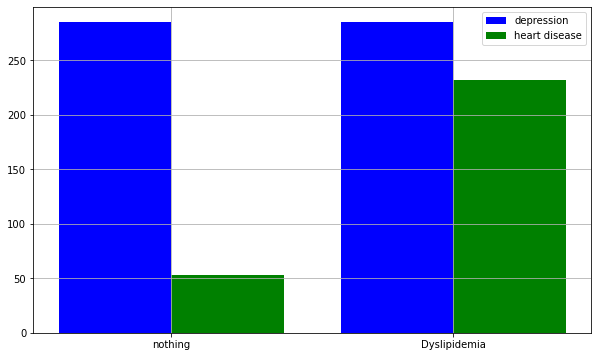

In [10]:
#파란색이 우울증 환자 수, 초록색 중 왼쪽은 이상지질혈증을 앓지 않는 환자 수, 오른쪽은 이상지질혈증 환자 수
y1 = np.array([len(d_data2),len(d_data2)])
y2 = np.array([(d_data2['DI2_pr'] == 0).sum(),(d_data2['DI2_pr'] == 1).sum()])

# X축 데이터
x = np.arange(len(y1))

# 그래프 너비
w = 0.4

# 그래프 크기 지정
plt.figure(figsize = (10, 6))

# 그래프 출력. y2는 막대의 너비만큼 오른쪽으로 이동시켜 그림
plt.bar(x, y1, color = 'blue', width = w, label = 'depression', align = 'center')
plt.bar(x + w, y2, color='green', width = w, label = 'heart disease', align = 'center')

# 최적 위치에 범례 배치
plt.legend(loc = 'best')
plt.xticks(x + w / 2, ['nothing','Dyslipidemia'])
plt.grid(True)

### 뇌졸중 

In [11]:
#우울증 앓는 사람 중 뇌졸중 환자 비율
#대상자가 아닌 사람들은 제외 (8,9)
d_data3 = d_data.drop(d_data[(d_data['DI3_pr'] == 8) | (d_data['DI3_pr'] == 9)].index)
(d_data3['DI3_pr'] == 1).sum() / len(d_data3)

0.7894736842105263

In [12]:
#우울증 앓는 사람 중 뇌졸중 환자를 뺀 비율
(d_data3['DI3_pr'] == 0).sum() / len(d_data3)

0.21052631578947367

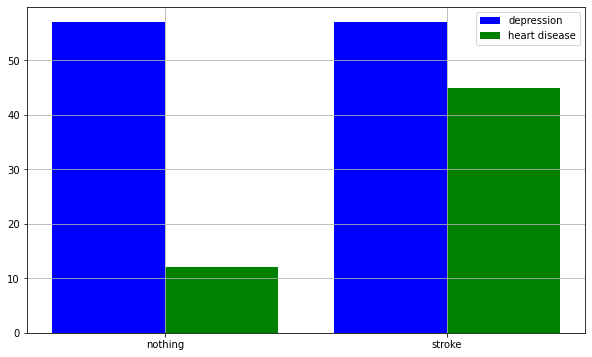

In [13]:
#파란색이 우울증 환자 수, 초록색 중 왼쪽은 뇌졸중 앓지 않는 환자 수, 오른쪽은 뇌졸중 환자 수
y1 = np.array([len(d_data3),len(d_data3)])
y2 = np.array([(d_data3['DI3_pr'] == 0).sum(),(d_data3['DI3_pr'] == 1).sum()])

# X축 데이터
x = np.arange(len(y1))

# 그래프 너비
w = 0.4

# 그래프 크기 지정
plt.figure(figsize = (10, 6))

# 그래프 출력. y2는 막대의 너비만큼 오른쪽으로 이동시켜 그림
plt.bar(x, y1, color = 'blue', width = w, label = 'depression', align = 'center')
plt.bar(x + w, y2, color='green', width = w, label = 'heart disease', align = 'center')

# 최적 위치에 범례 배치
plt.legend(loc = 'best')
plt.xticks(x + w / 2, ['nothing','stroke'])
plt.grid(True)

###  심근경색

In [14]:
#우울증 앓는 사람 중 심근경색 환자 비율
#대상자가 아닌 사람들은 제외 (8,9)
d_data4 = d_data.drop(d_data[(d_data['DI5_pr'] == 8) | (d_data['DI5_pr'] == 9)].index)
(d_data4['DI5_pr'] == 1).sum() / len(d_data4)

1.0

In [15]:
#우울증 앓는 사람 중 심근경색 환자를 뺀 비율
(d_data4['DI5_pr'] == 0).sum() / len(d_data4)

0.0

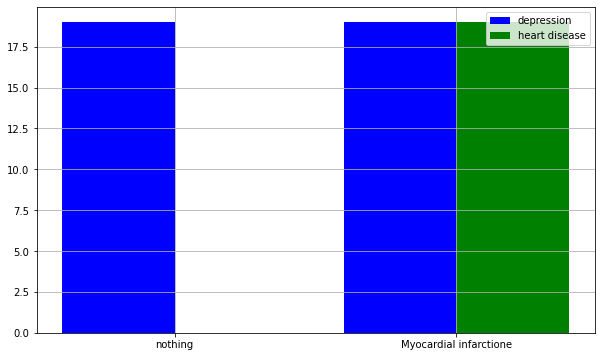

In [16]:
#파란색이 우울증 환자 수, 초록색 중 왼쪽은 심근경색 앓지 않는 환자 수, 오른쪽은 심근경색 환자 수
y1 = np.array([len(d_data4),len(d_data4)])
y2 = np.array([(d_data4['DI5_pr'] == 0).sum(),(d_data4['DI5_pr'] == 1).sum()])

# X축 데이터
x = np.arange(len(y1))

# 그래프 너비
w = 0.4

# 그래프 크기 지정
plt.figure(figsize = (10, 6))

# 그래프 출력. y2는 막대의 너비만큼 오른쪽으로 이동시켜 그림
plt.bar(x, y1, color = 'blue', width = w, label = 'depression', align = 'center')
plt.bar(x + w, y2, color='green', width = w, label = 'heart disease', align = 'center')

# 최적 위치에 범례 배치
plt.legend(loc = 'best')
plt.xticks(x + w / 2, ['nothing','Myocardial infarctione'])
plt.grid(True)

### 협심증 

In [17]:
#우울증 앓는 사람 중 협심증 환자 비율
#대상자가 아닌 사람들은 제외 (8,9)
d_data5 = d_data.drop(d_data[(d_data['DI6_pr'] == 8) | (d_data['DI6_pr'] == 9)].index)
(d_data5['DI6_pr'] == 1).sum() / len(d_data5)

0.7931034482758621

In [18]:
#우울증 앓는 사람 중 협심증 환자를 뺀 비율
(d_data5['DI6_pr'] == 0).sum() / len(d_data5)

0.20689655172413793

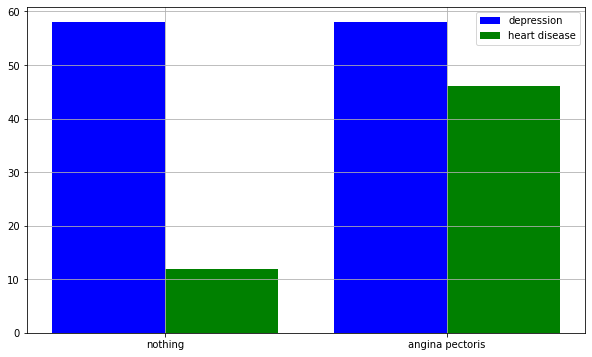

In [19]:
#파란색이 우울증 환자 수, 초록색 중 왼쪽은 협심증 앓지 않는 환자 수, 오른쪽은 협심증 환자 수
y1 = np.array([len(d_data5),len(d_data5)])
y2 = np.array([(d_data5['DI6_pr'] == 0).sum(),(d_data5['DI6_pr'] == 1).sum()])

# X축 데이터
x = np.arange(len(y1))

# 그래프 너비
w = 0.4

# 그래프 크기 지정
plt.figure(figsize = (10, 6))

# 그래프 출력. y2는 막대의 너비만큼 오른쪽으로 이동시켜 그림
plt.bar(x, y1, color = 'blue', width = w, label = 'depression', align = 'center')
plt.bar(x + w, y2, color='green', width = w, label = 'heart disease', align = 'center')

# 최적 위치에 범례 배치
plt.legend(loc = 'best')
plt.xticks(x + w / 2, ['nothing','angina pectoris'])
plt.grid(True)

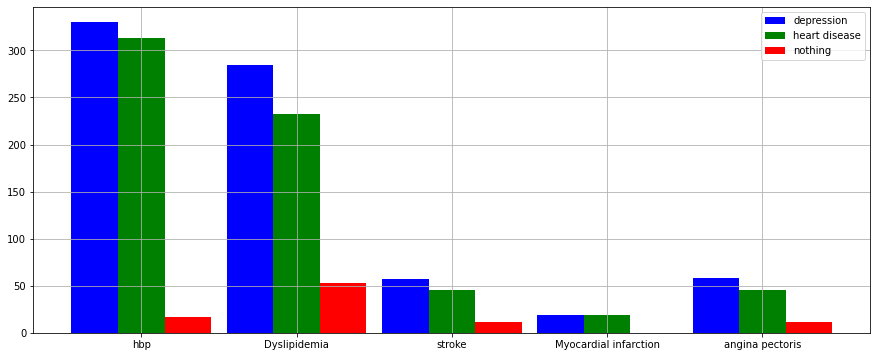

In [20]:
#파란색이 우울증 환자 수, 초록색이 그 중 심혈관 질환을 앓는 사람의 수
y1 = np.array([len(d_data1),len(d_data2),len(d_data3),len(d_data4),len(d_data5)])
y2 = np.array([(d_data1['DI1_pr'] == 1).sum(),(d_data2['DI2_pr'] == 1).sum(),(d_data3['DI3_pr'] == 1).sum(),(d_data4['DI5_pr'] == 1).sum(),(d_data5['DI6_pr'] == 1).sum()])
y3 = np.array([(d_data1['DI1_pr'] == 0).sum(),(d_data2['DI2_pr'] == 0).sum(),(d_data3['DI3_pr'] == 0).sum(),(d_data4['DI5_pr'] == 0).sum(),(d_data5['DI6_pr'] == 0).sum()])

# X축 데이터
x = np.arange(len(y1))

# 그래프 너비
w = 0.3

# 그래프 크기 지정
plt.figure(figsize = (15, 6))

# 그래프 출력. y2는 막대의 너비만큼 오른쪽으로 이동시켜 그림
plt.bar(x, y1, color = 'blue', width = w, label = 'depression', align = 'center')
plt.bar(x + w, y2, color='green', width = w, label = 'heart disease', align = 'center')
plt.bar(x + 2 * w  , y3, color='red', width = w, label = 'nothing', align = 'center')


# 최적 위치에 범례 배치
plt.legend(loc = 'best')
plt.xticks(x + w, ['hbp', 'Dyslipidemia', 'stroke','Myocardial infarction','angina pectoris'])
plt.grid(True)

#### 우울증 유병환자 중 심혈관 질환을 앓는 사람의 비율이 높게 나옴
      - 의사 진단을 받지 않았거나(DI*_pr == 8) 
        유병 여부를 모르거나 무응답한 사람이(DI*_pr == 9) 많아 정확한 결과가 나오지 않았을 수 있다
      - 특히 고혈압과 이상지질혈증을 제외한 나머지 세 항목에서는 응답 수가 적어 정확한 결과를 얻기 힘들다

# 우울증과 심혈관 질환의 진단시기 비교

## 고혈압 

<AxesSubplot:xlabel='DF2_ag', ylabel='DI1_ag'>

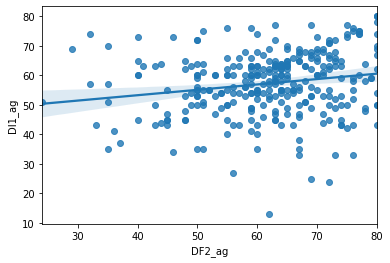

In [21]:
# 고혈압 진단 시기와 우울증 진단시기 비교
# 우울증과 고혈압의 진단시기를 모르는 경우(999) 제외
dp_data = d_data1[(d_data1['DI1_pr'] == 1) & (d_data1['DF2_ag'] != 999) & (d_data1['DI1_ag'] != 999)]
sns.regplot(data= dp_data, x = 'DF2_ag', y = 'DI1_ag')

## 이상지질혈증 

<AxesSubplot:xlabel='DF2_ag', ylabel='DI2_ag'>

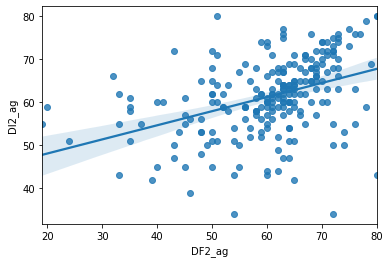

In [22]:
# 이상지질혈증 진단 시기와 우울증 진단시기 비교
# 우울증과 이상지질혈증의 진단시기를 모르는 경우(999) 제외
dp_data2 = d_data2[(d_data2['DI2_pr'] == 1) & (d_data2['DF2_ag'] != 999) & (d_data2['DI2_ag'] != 999)]
sns.regplot(data= dp_data2, x = 'DF2_ag', y = 'DI2_ag')

## 뇌졸중 

<AxesSubplot:xlabel='DF2_ag', ylabel='DI3_ag'>

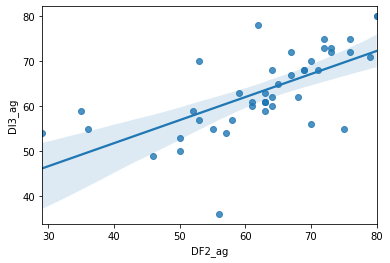

In [23]:
# 뇌졸중 진단 시기와 우울증 진단시기 비교
# 우울증과 뇌졸중의 진단시기를 모르는 경우(999) 제외
dp_data3 = d_data3[(d_data3['DI3_pr'] == 1) & (d_data3['DF2_ag'] != 999) & (d_data3['DI3_ag'] != 999)]
sns.regplot(data= dp_data3, x = 'DF2_ag', y = 'DI3_ag')

## 심근경색 

<AxesSubplot:xlabel='DF2_ag', ylabel='DI5_ag'>

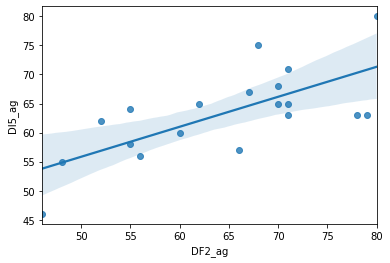

In [24]:
# 심근경색 진단 시기와 우울증 진단시기 비교
# 우울증과 심근경색의 진단시기를 모르는 경우(999) 제외
dp_data4 = d_data4[(d_data4['DI5_pr'] == 1) & (d_data4['DF2_ag'] != 999) & (d_data4['DI5_ag'] != 999)]
sns.regplot(data= dp_data4, x = 'DF2_ag', y = 'DI5_ag')

## 협심증 

<AxesSubplot:xlabel='DF2_ag', ylabel='DI6_ag'>

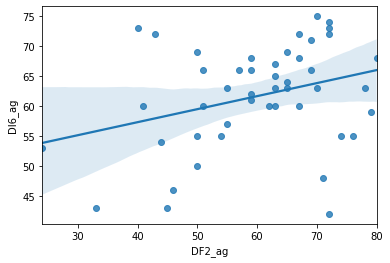

In [25]:
# 협심증 진단 시기와 우울증 진단시기 비교
# 우울증과 협심증의 진단시기를 모르는 경우(999) 제외
dp_data5 = d_data5[(d_data5['DI6_pr'] == 1) & (d_data5['DF2_ag'] != 999) & (d_data5['DI6_ag'] != 999)]
sns.regplot(data= dp_data5, x = 'DF2_ag', y = 'DI6_ag')

#### 우울증과 심혈관 질환의 진단시기에는 큰 연관성이 없어 보임